<a href="https://colab.research.google.com/github/swapnilbpatil/laptop-price-predictor/blob/main/laptop_price_predictor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2817]:
df = pd.read_csv("/content/laptop_data.csv")

In [2818]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2819]:
df.shape

(1303, 12)

In [2820]:
df.duplicated().sum()

0

In [2821]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [2822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [2823]:
df = df.drop(columns=['Unnamed: 0'])

In [2824]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [2825]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [2826]:
df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')


In [2827]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [2828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [2829]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038733,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


In [2830]:
df.corr()

,Inches,Ram,Weight,Price
Inches,1.000000,0.237993,0.827631,0.068197
Ram,0.237993,1.000000,0.383874,0.743007
Weight,0.827631,0.383874,1.000000,0.210370
Price,0.068197,0.743007,0.210370,1.000000


In [2831]:
#One by one see columns

# **Column:-Company**

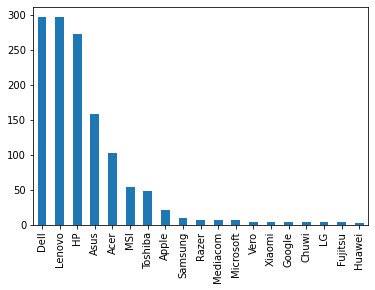

In [2832]:
df['Company'].value_counts().plot(kind='bar')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

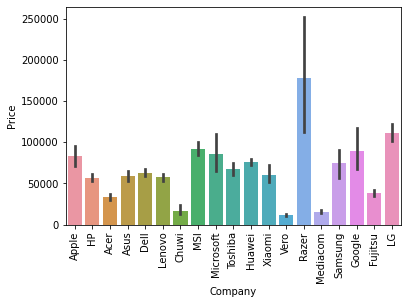

In [2833]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt

# **Column:-TypeName**

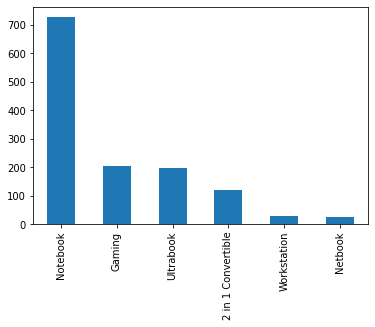

In [2834]:
df['TypeName'].value_counts().plot(kind='bar')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

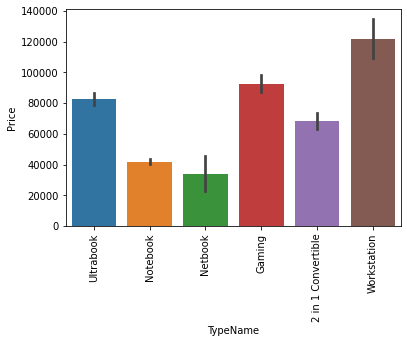

In [2835]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt

# **Column:-Inches**

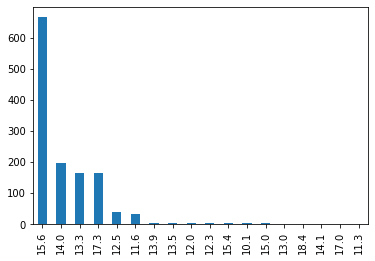

In [2836]:
df['Inches'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


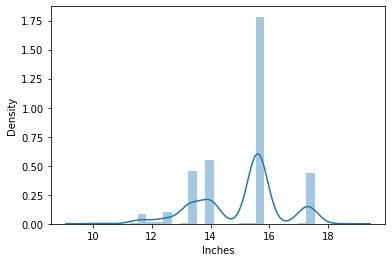

In [2837]:
sns.distplot(df['Inches'])

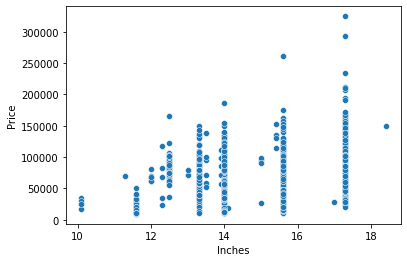

In [2838]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

# **Column:-ScreenResolution**

In [2839]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [2840]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [2841]:
#we see in this column mupltipal imformation

In [2842]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [2843]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,56476.800,0
56,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.91,23389.920,0
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370.192,1
248,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,35964.000,1
562,HP,Ultrabook,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y75 1.2GHz,16,512GB SSD,Intel HD Graphics 515,Windows 10,1.16,104695.200,1


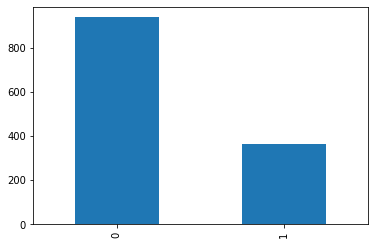

In [2844]:
df['IPS'].value_counts().plot(kind='bar')


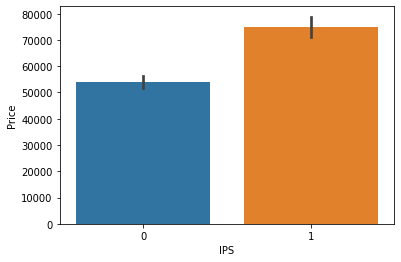

In [2845]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [2846]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0 )

In [2847]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
170,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,71874.72,1,0
197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.52,0,0
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,0,0
400,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.20,16303.68,0,0
1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1


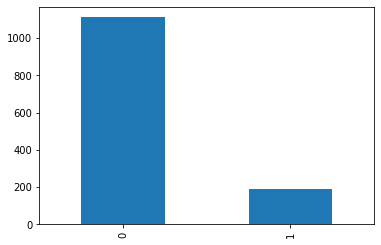

In [2848]:
df['Touchscreen'].value_counts().plot(kind='bar')

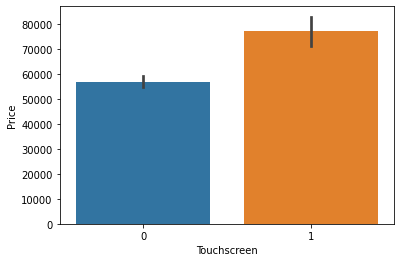

In [2849]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [2850]:
new = df['ScreenResolution'].str.split('x',expand=True,n=1)

In [2851]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [2852]:
df['X_resolution'] = new[0]
df['y_resolution'] = new[1]

In [2853]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,X_resolution,y_resolution
562,HP,Ultrabook,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y75 1.2GHz,16,512GB SSD,Intel HD Graphics 515,Windows 10,1.16,104695.200,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.496,0,0,Full HD 1920,1080
453,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.65,71661.600,0,0,Full HD 1920,1080
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316.000,0,0,1366,768
636,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,99580.320,0,1,Quad HD+ / Touchscreen 3200,1800


In [2854]:
 #with the help of regular expression
df['X_resolution']=df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [2855]:
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,X_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600


In [2856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  y_resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [2857]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['y_resolution'] = df['y_resolution'].astype('int')

In [2858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_resolution      1303 non-null   int64  
 14  y_resolution      1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [2859]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
IPS             0.252208
Touchscreen     0.191226
X_resolution    0.556529
y_resolution    0.552809
Name: Price, dtype: float64

In [2860]:
df['pixel/in'] = (df['X_resolution']**2 + df['y_resolution']**2)**0.5/df['Inches']

In [2861]:
df['pixel/in']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: pixel/in, Length: 1303, dtype: float64

In [2862]:
df['pixel/in'] = df['pixel/in'].astype('float')

In [2863]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,X_resolution,y_resolution,pixel/in
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,226.983005


In [2864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_resolution      1303 non-null   int64  
 14  y_resolution      1303 non-null   int64  
 15  pixel/in          1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

In [2865]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'IPS', 'Touchscreen',
       'X_resolution', 'y_resolution', 'pixel/in'],
      dtype='object')

In [2866]:
df.drop(columns=['Inches', 'ScreenResolution','X_resolution', 'y_resolution'],inplace=True)

In [2867]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


# **Column:-Cpu**

In [2868]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Pentium Dual Core 4405U 2.1GHz      1
AMD E-Series 9000 2.2GHz                  1
Intel Core i5 2.0GHz                      1
Intel Core i7 6560U 2.2GHz                1
Intel Atom x5-Z8300 1.44GHz               1
Name: Cpu, Length: 118, dtype: int64

In [2869]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
               

In [2870]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


In [2871]:
df['Cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
Intel Atom X5-Z8350           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD E-Series E2-9000e         2
AMD A10-Series 9620P          2
Intel Xeon E3-1535M           2
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 9830P                  1
AMD E-Series 9000e            1
AMD A6-Series 7310            1
AMD A4-S

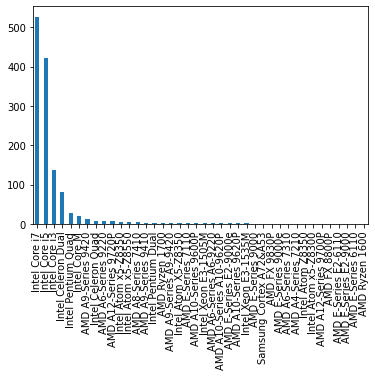

In [2872]:
df['Cpu_name'].value_counts().plot(kind='bar')

In [2873]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':  
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'    

In [2874]:
df['Cpu brand'] = df['Cpu_name'].apply(fetch_processor)

In [2875]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu_name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7


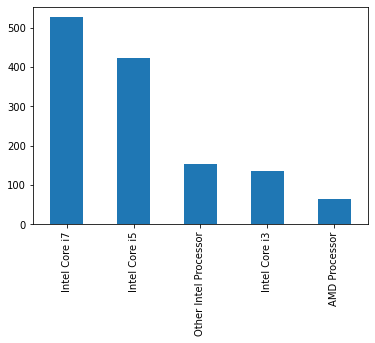

In [2876]:
df['Cpu brand'].value_counts().plot(kind='bar')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

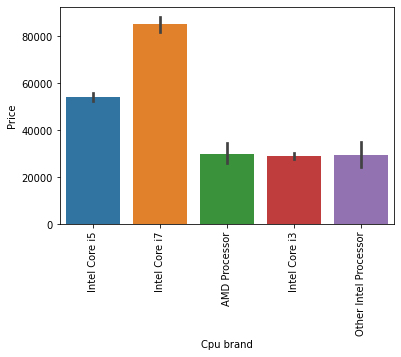

In [2877]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt

In [2878]:
df.drop(columns=['Cpu_name','Cpu'],inplace=True)

In [2879]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


# **Column:-Ram**

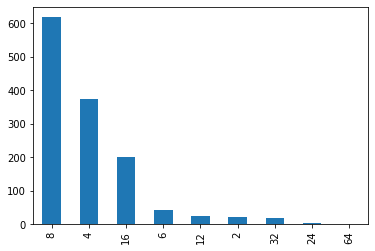

In [2880]:
df['Ram'].value_counts().plot(kind='bar')

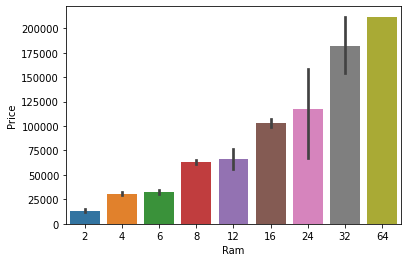

In [2881]:
sns.barplot(x=df['Ram'],y=df['Price'])

# **Column:-Memory**

In [2882]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB HDD                          1
2

In [2883]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [2884]:
#with the help of regular expression we seprate out data
df['Memory']=df['Memory'].astype(str).replace('\.0', '', regex=True)

In [2885]:
df['Memory'].head(5)

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: Memory, dtype: object

In [2886]:
df['Memory'] = df["Memory"].str.replace('GB', '')

In [2887]:
df['Memory']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301              1TB HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [2888]:
df['Memory'] = df["Memory"].str.replace('TB', '000')

In [2889]:
df['Memory']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [2890]:
new=df['Memory'].str.split('+',n=1,expand=True)

In [2891]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [2892]:
df['new_1'] = new[0]

In [2893]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD


In [2894]:
df['new_1']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: new_1, Length: 1303, dtype: object

In [2895]:
#Remove space both side (right and left)
df['new_1'] = df['new_1'].str.strip()

In [2896]:
df['new_1']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: new_1, Length: 1303, dtype: object

In [2897]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD


In [2898]:
df['new_2'] = new[1]

In [2899]:
df['new_2'] = df['new_2'].str.strip()

In [2900]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD,None


In [2901]:
df['new_1_SSD']=df['new_1'].apply(lambda x:1 if 'SSD' in x else 0)

In [2902]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD,None,1
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,1
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD,None,1
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD,None,1


In [2903]:
df['new_1_HDD']=df['new_1'].apply(lambda x:1 if 'HDD' in x else 0)

In [2904]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD
360,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.86,23389.92,0,0,100.454670,Intel Core i3,500 HDD,None,0,1
708,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.80,63456.48,0,0,157.350512,Intel Core i5,256 SSD,None,1,0
181,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.72,0,0,165.632118,Intel Core i5,256 SSD,None,1,0
1180,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.36,87219.36,1,1,209.800683,Intel Core i5,256 SSD,None,1,0
1278,Dell,Notebook,2,500 HDD,Intel HD Graphics,Windows 10,2.20,20193.12,0,0,100.454670,Other Intel Processor,500 HDD,None,0,1


In [2905]:
df['new_1_FS']=df['new_1'].apply(lambda x:1 if 'Flash Storage' in x else 0 )

In [2906]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD,None,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD,None,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD,None,1,0,0


In [2907]:
df['new_1_Hybrid']=df['new_1'].apply(lambda x:1 if 'Hybrid' in x else 0)

In [2908]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128 SSD,None,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,1,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,1,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512 SSD,None,1,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256 SSD,None,1,0,0,0


In [2909]:
# remove word
df['new_1']=df['new_1'].str.replace(r'\D', '')

In [2910]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,None,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0,1,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,1,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,None,1,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,None,1,0,0,0


In [2911]:
df['new_2']

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: new_2, Length: 1303, dtype: object

In [2912]:
# fill none value
df['new_2']=df['new_2'].fillna("0")

In [2913]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,1,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,1,0,0,0


In [2914]:
df['new_2_SSD'] = df['new_2'].apply(lambda x:1 if 'SSD' in x else 0)

In [2915]:
df['new_2_HDD'] = df['new_2'].apply(lambda x:1 if 'HDD' in x else 0)

In [2916]:
df['new_2_FS'] = df['new_2'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [2917]:
df['new_2_Hybrid'] = df['new_2'].apply(lambda x:1 if 'Hybrid' in x else 0)

In [2918]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid,new_2_SSD,new_2_HDD,new_2_FS,new_2_Hybrid
472,Google,Ultrabook,8,128 SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.0000,0,1,234.507400,Intel Core i5,128,0,1,0,0,0,0,0,0,0
833,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.70,63190.0800,0,0,157.350512,Intel Core i5,256,0,1,0,0,0,0,0,0,0
332,Asus,Notebook,8,256 SSD + 1000 HDD,Intel HD Graphics 620,Windows 10,2.00,71075.5200,0,0,157.350512,Intel Core i7,256,1000 HDD,1,0,0,0,0,1,0,0
494,Asus,Gaming,24,256 SSD + 1000 HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,67612.3200,1,1,127.335675,Intel Core i7,256,1000 HDD,1,0,0,0,0,1,0,0
40,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Linux,2.00,20725.9200,0,0,141.211998,Intel Core i3,1000,0,0,1,0,0,0,0,0,0
1155,HP,Notebook,4,256 SSD,AMD Radeon 520,Windows 10,1.91,25515.2592,0,0,141.211998,AMD Processor,256,0,1,0,0,0,0,0,0,0
397,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.90,49976.6400,1,0,157.350512,Intel Core i5,256,0,1,0,0,0,0,0,0,0
82,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.63,45820.8000,0,0,157.350512,Intel Core i5,256,0,1,0,0,0,0,0,0,0
1115,Dell,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,0,0,165.632118,Intel Core i7,256,0,1,0,0,0,0,0,0,0
291,Asus,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,63243.3600,0,0,127.335675,Intel Core i7,1000,0,0,1,0,0,0,0,0,0


In [2919]:
df['new_2']=df['new_2'].str.replace(r'\D','')

In [2920]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Ram           1303 non-null   int32  
 3   Memory        1303 non-null   object 
 4   Gpu           1303 non-null   object 
 5   OpSys         1303 non-null   object 
 6   Weight        1303 non-null   float32
 7   Price         1303 non-null   float64
 8   IPS           1303 non-null   int64  
 9   Touchscreen   1303 non-null   int64  
 10  pixel/in      1303 non-null   float64
 11  Cpu brand     1303 non-null   object 
 12  new_1         1303 non-null   object 
 13  new_2         1303 non-null   object 
 14  new_1_SSD     1303 non-null   int64  
 15  new_1_HDD     1303 non-null   int64  
 16  new_1_FS      1303 non-null   int64  
 17  new_1_Hybrid  1303 non-null   int64  
 18  new_2_SSD     1303 non-null 

In [2921]:
df['new_1'] = df['new_1'].astype(int)
df['new_2'] = df['new_2'].astype(int)

In [2922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Ram           1303 non-null   int32  
 3   Memory        1303 non-null   object 
 4   Gpu           1303 non-null   object 
 5   OpSys         1303 non-null   object 
 6   Weight        1303 non-null   float32
 7   Price         1303 non-null   float64
 8   IPS           1303 non-null   int64  
 9   Touchscreen   1303 non-null   int64  
 10  pixel/in      1303 non-null   float64
 11  Cpu brand     1303 non-null   object 
 12  new_1         1303 non-null   int64  
 13  new_2         1303 non-null   int64  
 14  new_1_SSD     1303 non-null   int64  
 15  new_1_HDD     1303 non-null   int64  
 16  new_1_FS      1303 non-null   int64  
 17  new_1_Hybrid  1303 non-null   int64  
 18  new_2_SSD     1303 non-null 

In [2923]:
df['SSD'] = (df['new_1']*df['new_1_SSD'])+(df['new_2']*df['new_2_SSD'])

In [2924]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid,new_2_SSD,new_2_HDD,new_2_FS,new_2_Hybrid,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,1,0,0,0,0,0,0,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,0,0,0,0,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,1,0,0,0,0,0,0,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,1,0,0,0,0,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,1,0,0,0,0,0,0,0,128
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,1,0,0,0,0,0,0,0,512
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64,0,0,0,1,0,0,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,1,0,0,0,0,0,0,0


In [2925]:
df['HDD'] = (df['new_1']*df['new_1_HDD'])+(df['new_2']*df['new_2_HDD'])

In [2926]:
df['Flash Storage'] = (df['new_1']*df['new_1_FS'])+(df['new_2']*df['new_2_FS'])

In [2927]:
df['Hybrid'] = (df['new_1']*df['new_1_Hybrid'])+(df['new_2']*df['new_2_Hybrid'])

In [2928]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,new_1,new_2,new_1_SSD,new_1_HDD,new_1_FS,new_1_Hybrid,new_2_SSD,new_2_HDD,new_2_FS,new_2_Hybrid,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,1,0,0,0,0,0,0,0,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,0,0,0,0,0,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,0,0,0,0,0,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,1,0,0,0,0,0,0,0,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,1,0,0,0,0,0,0,0,256,0,0,0


In [2929]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'IPS', 'Touchscreen', 'pixel/in', 'Cpu brand', 'new_1',
       'new_2', 'new_1_SSD', 'new_1_HDD', 'new_1_FS', 'new_1_Hybrid',
       'new_2_SSD', 'new_2_HDD', 'new_2_FS', 'new_2_Hybrid', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid'],
      dtype='object')

In [2930]:
df=df.drop(columns=[ 'Memory','new_1',
       'new_2', 'new_1_SSD', 'new_1_HDD', 'new_1_FS', 'new_1_Hybrid',
       'new_2_SSD', 'new_2_HDD', 'new_2_FS', 'new_2_Hybrid'])

In [2931]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,0,0


In [2932]:
df.corr()

,Ram,Weight,Price,IPS,Touchscreen,pixel/in,SSD,HDD,Flash Storage,Hybrid
Ram,1.000000,0.383874,0.743007,0.206623,0.116984,0.303763,0.603634,0.096288,-0.060177,0.038461
Weight,0.383874,1.000000,0.210370,0.016967,-0.294620,-0.323240,-0.062742,0.514491,-0.179916,0.095155
Price,0.743007,0.210370,1.000000,0.252208,0.191226,0.473487,0.670799,-0.096441,-0.040511,0.007989
IPS,0.206623,0.016967,0.252208,1.000000,0.150512,0.300879,0.223795,-0.094461,0.069643,-0.022601
Touchscreen,0.116984,-0.294620,0.191226,0.150512,1.000000,0.460587,0.255092,-0.209733,-0.019080,-0.039679
pixel/in,0.303763,-0.323240,0.473487,0.300879,0.460587,1.000000,0.506895,-0.295411,0.077753,-0.020212
SSD,0.603634,-0.062742,0.670799,0.223795,0.255092,0.506895,1.000000,-0.399896,-0.147991,-0.059750
HDD,0.096288,0.514491,-0.096441,-0.094461,-0.209733,-0.295411,-0.399896,1.000000,-0.117658,-0.076596
Flash Storage,-0.060177,-0.179916,-0.040511,0.069643,-0.019080,0.077753,-0.147991,-0.117658,1.000000,-0.014368
Hybrid,0.038461,0.095155,0.007989,-0.022601,-0.039679,-0.020212,-0.059750,-0.076596,-0.014368,1.000000


In [2933]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
IPS              0.252208
Touchscreen      0.191226
pixel/in         0.473487
SSD              0.670799
HDD             -0.096441
Flash Storage   -0.040511
Hybrid           0.007989
Name: Price, dtype: float64

In [2934]:
#Flash Storage and Hybrid is not more corr so we remove it
df = df.drop(columns=['Flash Storage','Hybrid'])

In [2935]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0


# **Column:-Gpu**

In [2936]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 430            1
Nvidia GeForce GTX 980       1
Intel Graphics 620           1
Nvidia Quadro M3000M         1
AMD Radeon Pro 560           1
Name: Gpu, Length: 110, dtype: int64

In [2937]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [2938]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel


In [2939]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [2940]:
df[df['Gpu_brand']=='ARM']


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [2941]:
df = df[df['Gpu_brand']!='ARM']

In [2942]:
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel


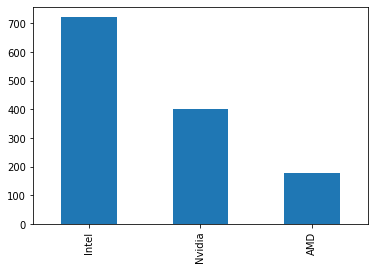

In [2943]:
df['Gpu_brand'].value_counts().plot(kind='bar')

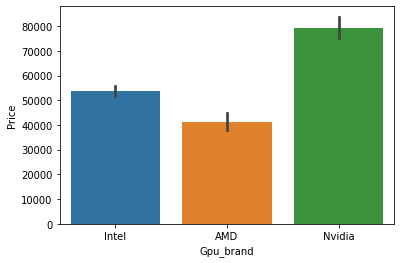

In [2944]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])

In [2945]:
df=df.drop(columns=['Gpu'])

In [2946]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel


# **Column:-OpSys**

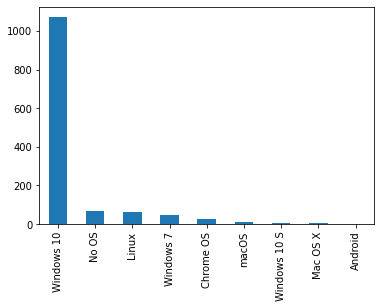

In [2947]:
df['OpSys'].value_counts().plot(kind='bar')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

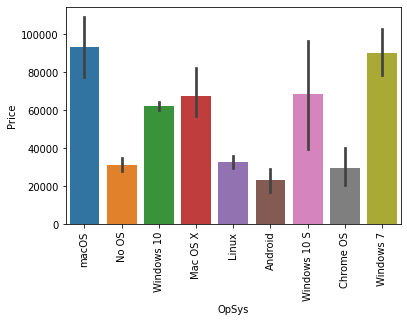

In [2948]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt

In [2949]:
def Op_Sys(input):
  if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
    return 'Windows'
  elif input == 'macOS' or input == 'Mac OS X':
    return 'Mac'
  else:
    return 'Other_OpSys'

In [2950]:
df['Op_Sys'] = df['OpSys'].apply(Op_Sys)

In [2951]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Other_OpSys
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel,Mac


In [2952]:
df=df.drop(columns=['OpSys'])

In [2953]:
df.head()

,Company,TypeName,Ram,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Other_OpSys
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel,Mac


# **Column:-Weight**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


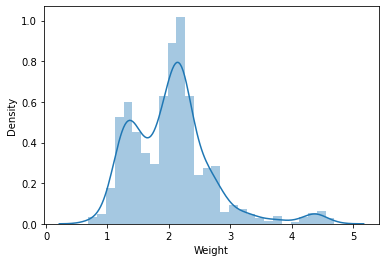

In [2954]:
sns.distplot(df['Weight'])

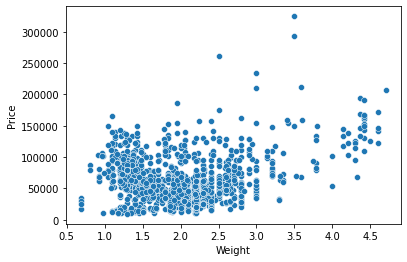

In [2955]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

# **Column:-Price**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


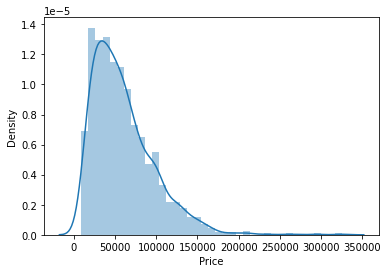

In [2956]:
sns.distplot(df['Price'])

In [2957]:
np.log(df['Price'])

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


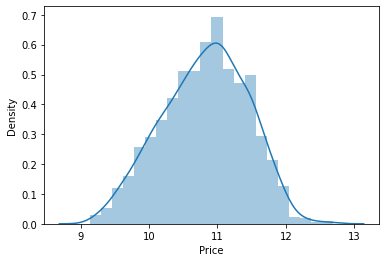

In [2958]:
sns.distplot(np.log(df['Price']))

In [2959]:
df.corr()

,Ram,Weight,Price,IPS,Touchscreen,pixel/in,SSD,HDD
Ram,1.000000,0.383362,0.742905,0.207949,0.118875,0.305688,0.603379,0.095808
Weight,0.383362,1.000000,0.209867,0.018643,-0.293004,-0.321883,-0.063818,0.514147
Price,0.742905,0.209867,1.000000,0.253320,0.192917,0.475368,0.670660,-0.096891
IPS,0.207949,0.018643,0.253320,1.000000,0.148026,0.299142,0.225311,-0.093588
Touchscreen,0.118875,-0.293004,0.192917,0.148026,1.000000,0.458571,0.257577,-0.208766
pixel/in,0.305688,-0.321883,0.475368,0.299142,0.458571,1.000000,0.509437,-0.294698
SSD,0.603379,-0.063818,0.670660,0.225311,0.257577,0.509437,1.000000,-0.400750
HDD,0.095808,0.514147,-0.096891,-0.093588,-0.208766,-0.294698,-0.400750,1.000000


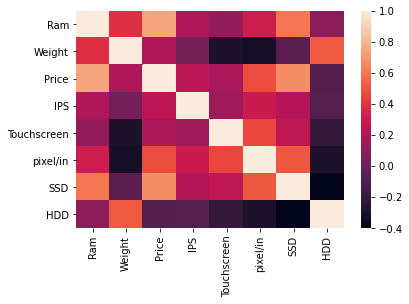

In [2960]:
sns.heatmap(df.corr())

In [2961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   IPS          1302 non-null   int64  
 6   Touchscreen  1302 non-null   int64  
 7   pixel/in     1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   SSD          1302 non-null   int64  
 10  HDD          1302 non-null   int64  
 11  Gpu_brand    1302 non-null   object 
 12  Op_Sys       1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 172.2+ KB


In [2962]:
X = df.drop(columns=['Price'])

In [2963]:
X

,Company,TypeName,Ram,Weight,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Other_OpSys
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1000,AMD,Windows


In [2964]:
y = np.log(df['Price'])

In [2965]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


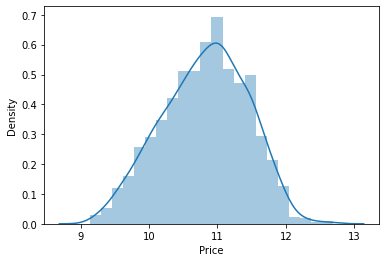

In [2966]:
sns.distplot(y)

# **Train_Test_Split**

In [2967]:
from sklearn.model_selection import train_test_split

In [2968]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [2969]:
X_train

,Company,TypeName,Ram,Weight,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128,1000,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Other_OpSys
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0,1000,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128,1000,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0,500,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0,1000,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0,2000,Nvidia,Other_OpSys


In [2970]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

In [2971]:
X_test

,Company,TypeName,Ram,Weight,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
248,HP,Notebook,4,1.49,1,0,165.632118,Intel Core i5,0,500,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,0,500,Intel,Other_OpSys
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,0,500,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,0,1000,Intel,Other_OpSys
885,HP,2 in 1 Convertible,4,1.28,0,1,165.632118,Intel Core i5,256,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,1,0,127.335675,Intel Core i5,128,1000,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,0,500,AMD,Other_OpSys
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,256,0,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,256,0,Intel,Windows


In [2972]:
y_test

248     10.490274
555      9.387207
1251     9.964522
547     10.111883
885     11.470547
          ...    
1129    11.004649
172      9.708902
322     10.973157
996     11.182680
470     11.575963
Name: Price, Length: 196, dtype: float64

In [2973]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder


# **Linear Regression**

In [2974]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418648
MAE 0.21017827976428793


# **Ridge**

In [2975]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


# **Lasso**

In [2976]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071852167167333
MAE 0.21114369519421036


# **Decision Tree**

In [2977]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8464317225309264
MAE 0.17957061594060097


## **KNeighbors**

In [2978]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8031807137073603
MAE 0.19268001684129435


# **Random Forest**

In [2979]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.887617461790065
MAE 0.15749549737623467


# **AdaBoost**

In [2980]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7837738305027212
MAE 0.23344672812463046


# **Gradient Boost**

In [2981]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8814611713043998
MAE 0.15965863119898605


# **XGBoost**

In [2982]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8811773435850243
MAE 0.16496203512600974


# **Voting**

In [2983]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=300,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=200,max_features=0.5)
xgb = XGBRegressor(n_estimators=40,learning_rate=0.3,max_depth=5)


step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[18:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8919310480088654
MAE 0.15606660757563368


# **Stacking**

In [2984]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[18:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8816959399561766
MAE 0.16652310850542085


# **Exporting the Model**

In [2985]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [2986]:
df

,Company,TypeName,Ram,Weight,Price,IPS,Touchscreen,pixel/in,Cpu brand,SSD,HDD,Gpu_brand,Op_Sys
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Other_OpSys
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1000,AMD,Windows
